In [1]:
from qubecalib.neopulseexp import Sequence, Slot

with Sequence() as seq:
    Slot(100e-9)
    Slot(200e-9)
    Slot(300e-9)

seq._tree.place_slots()
seq, seq._tree._nodes_items

(Sequence([Slot(duration=1e-07, begin=0.0),
           Slot(duration=2e-07, begin=1e-07),
           Slot(duration=3e-07, begin=3e-07)]),
 {1: Slot(duration=1e-07, begin=0.0),
  2: Slot(duration=2e-07, begin=1e-07),
  3: Slot(duration=3e-07, begin=3e-07)})

In [2]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Series():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()

({1: SeriesBranch(duration=3.0000000000000004e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=1.0000000000000003e-09)},
 Tree(list, {0: [1, 2], 2: [3], 3: [4], 1: [], 4: []}))

In [3]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushleft():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()

({1: FlushleftBranch(duration=2e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=0.0)},
 Tree(list, {0: [1, 2], 2: [3, 4], 1: [], 3: [], 4: []}))

In [4]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with Flushright():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree(), seq._tree._tree._cost

({1: FlushrightBranch(duration=2e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Padding(duration=1e-09, begin=0.0),
  5: Padding(duration=0.0, begin=0.0),
  4: Slot(duration=1e-09, begin=1e-09),
  6: Slot(duration=2e-09, begin=0.0)},
 Tree(list, {0: [1, 2], 2: [3, 5], 3: [4], 5: [6], 1: [], 4: [], 6: []}),
 {1: 2e-09, 2: 0, 3: 1e-09, 5: 0.0, 4: 1e-09, 6: 2e-09})

In [5]:
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

print(seq._tree._nodes_items)
seq._tree.place_slots()
seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost


{1: SubSequenceBranch(duration=None, begin=None, next_node=1, root_node=2), 2: Dummy(duration=0, begin=None), 3: Slot(duration=9e-09, begin=None), 4: FlushrightBranch(duration=None, begin=None, next_node=4, root_node=5), 5: Dummy(duration=0, begin=None), 16: FlushleftBranch(duration=None, begin=None, next_node=16, root_node=17), 17: Dummy(duration=0, begin=None), 6: Padding(duration=0, begin=None), 11: Padding(duration=0, begin=None), 18: SeriesBranch(duration=None, begin=None, next_node=18, root_node=19), 19: Dummy(duration=0, begin=None), 22: SeriesBranch(duration=None, begin=None, next_node=22, root_node=23), 23: Dummy(duration=0, begin=None), 7: SeriesBranch(duration=None, begin=None, next_node=7, root_node=8), 8: Dummy(duration=0, begin=None), 12: SeriesBranch(duration=None, begin=None, next_node=12, root_node=13), 13: Dummy(duration=0, begin=None), 20: Slot(duration=5e-09, begin=None), 24: Slot(duration=7e-09, begin=None), 9: Slot(duration=1e-09, begin=None), 14: Slot(duration=3e

({1: SubSequenceBranch(duration=3.1e-08, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=9e-09, begin=0.0),
  4: FlushrightBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=4, root_node=5),
  5: Dummy(duration=0, begin=9e-09),
  16: FlushleftBranch(duration=1.5000000000000002e-08, begin=1.5999999999999998e-08, next_node=16, root_node=17),
  17: Dummy(duration=0, begin=1.5999999999999998e-08),
  6: Padding(duration=3.9999999999999994e-09, begin=9e-09),
  11: Padding(duration=0.0, begin=9e-09),
  18: SeriesBranch(duration=1.1e-08, begin=1.5999999999999998e-08, next_node=18, root_node=19),
  19: Dummy(duration=0, begin=1.5999999999999998e-08),
  22: SeriesBranch(duration=1.5000000000000002e-08, begin=1.5999999999999998e-08, next_node=22, root_node=23),
  23: Dummy(duration=0, begin=1.5999999999999998e-08),
  7: SeriesBranch(duration=3.0000000000000004e-09, begin=1.2999999999999997e-08, next_node=7, root_node=8),
  8: Dummy(duration=0

SubSequenceBranch, 0.0, 3.0000000000000004e-09


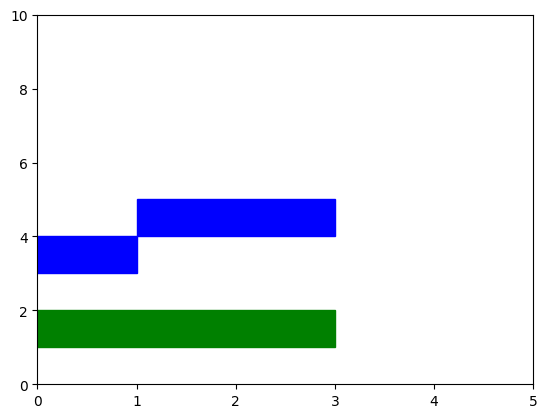

({1: SubSequenceBranch(duration=3.0000000000000004e-09, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=1e-09, begin=0.0),
  4: Slot(duration=2e-09, begin=1.0000000000000003e-09)},
 Tree(list, {0: [1, 2], 2: [3], 3: [4], 1: [], 4: []}))

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright

%matplotlib inline

with Sequence() as seq:
    with SubSequence():
        Slot(1e-9)
        Slot(2e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,5)
ax.set_ylim(0,10)
plt.show()

seq._tree._nodes_items, seq._get_tree()

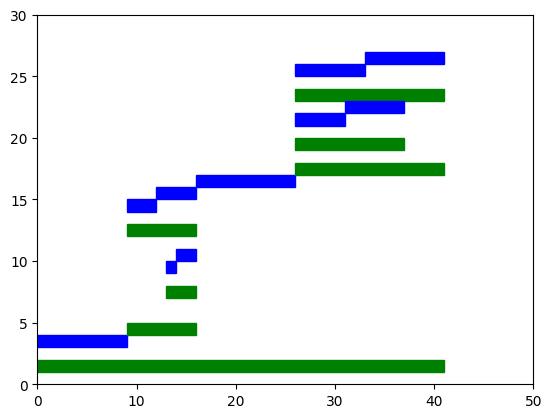

({1: SubSequenceBranch(duration=4.0999999999999997e-08, begin=0.0, next_node=1, root_node=2),
  2: Dummy(duration=0, begin=0.0),
  3: Slot(duration=9e-09, begin=0.0),
  4: FlushrightBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=4, root_node=5),
  5: Dummy(duration=0, begin=9e-09),
  16: Slot(duration=1e-08, begin=1.5999999999999998e-08),
  6: Padding(duration=3.9999999999999994e-09, begin=9e-09),
  11: Padding(duration=0.0, begin=9e-09),
  17: FlushleftBranch(duration=1.5000000000000002e-08, begin=2.5999999999999995e-08, next_node=17, root_node=18),
  18: Dummy(duration=0, begin=2.5999999999999998e-08),
  7: SeriesBranch(duration=3.0000000000000004e-09, begin=1.2999999999999997e-08, next_node=7, root_node=8),
  8: Dummy(duration=0, begin=1.2999999999999999e-08),
  12: SeriesBranch(duration=7e-09, begin=8.999999999999998e-09, next_node=12, root_node=13),
  13: Dummy(duration=0, begin=9e-09),
  19: SeriesBranch(duration=1.1e-08, begin=2.6e-08, next_node=19, root_node=20),

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, Branch
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop

%matplotlib inline

with Sequence() as seq:
    with SubSequence():
        Slot(9e-9)
        with Flushright():
            with Series():
                Slot(1e-9)
                Slot(2e-9)
            with Series():
                Slot(3e-9)
                Slot(4e-9)
        Slot(10e-9)
        with Flushleft():
            with Series():
                Slot(5e-9)
                Slot(6e-9)
            with Series():
                Slot(7e-9)
                Slot(8e-9)

seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        # print(f"{_.__class__.__name__}, {_.begin}, {_.duration}")
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
ax.set_xlim(0,50)
ax.set_ylim(0,30)
plt.show()

seq._tree._nodes_items, seq._get_tree()#, seq._tree._tree._cost


In [8]:
import math, cmath
class Test:
    def __init__(self):
        self.amplitude = 1.
        self.phase = 0.
    def __rmul__(self, other: complex):
        p = self.phase / 180. * math.pi
        c = self.amplitude * (math.cos(p) + 1j * math.sin(p))
        r = other * c
        self.amplitude = math.sqrt((r * r.conjugate()).real)
        self.phase = math.atan2(r.imag, r.real)/math.pi * 180
        return self
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(amplitude={self.amplitude}, phase={self.phase})"


c1 = Test()
0.5 * cmath.exp(1j*math.pi/2) * Test()

Test(amplitude=0.5, phase=90.0)

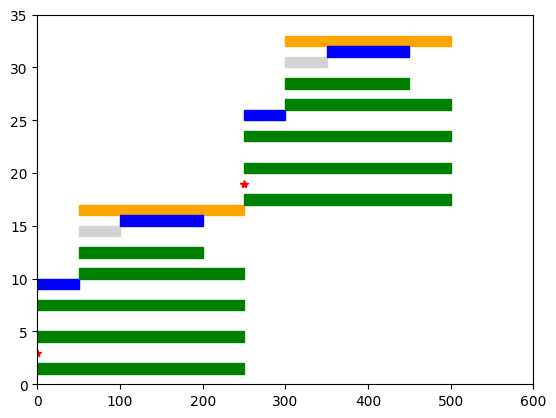

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from qubecalib.neopulseexp import Sequence, SubSequence, Slot, Series, Flushleft, Flushright, RaisedCosFlatTop, TargetHolder, Blank, Range, Branch, SubSequenceBranch
from qubecalib.neopulseexp import Modifier
from typing import Optional
%matplotlib inline

class THSlot(Slot, TargetHolder):
    def __init__(self, duration: Optional[float] = None) -> None:
        super().__init__(duration)
        TargetHolder.__init__(self)

with Sequence() as seq:
    with SubSequence():
        Modifier()
        with Flushright():
            with Series():
                THSlot(50e-9).set_target("CQ1")
                with Flushleft():
                    with Series():
                        Blank(50e-9)
                        THSlot(100e-9).set_target("RQ1GEN")
                    Range(200e-9).set_target("RQ1CAP")
    with SubSequence():
        Modifier()
        with Flushright():
            with Series():
                THSlot(50e-9).set_target("CQ1")
                with Flushleft():
                    with Series():
                        Blank(50e-9)
                        THSlot(100e-9).set_target("RQ1GEN")
                    Range(200e-9).set_target("RQ1CAP")

# seq._tree._nodes_items, seq._tree._tree._tree
seq._tree.place_slots()

fig = plt.figure()
ax = fig.gca()
for i, _ in seq._tree._nodes_items.items():
    if isinstance(_, Branch):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='green'))
        continue
    if isinstance(_, Blank):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='lightgray'))
        continue
    if isinstance(_, Range):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='orange'))
        continue
    if isinstance(_, Modifier):
        ax.plot(_.begin*1e9, i, '*', color='red')
        continue
    if isinstance(_, Slot):
        ax.add_patch(patches.Rectangle(xy=(_.begin*1e9, i), width=_.duration*1e9, height=1, color='blue'))
        continue
ax.set_xlim(0,600)
ax.set_ylim(0,35)
plt.show()


In [30]:
seq._group_items_by_target()

{'CQ1': [THSlot(duration=5e-08, begin=0.0), THSlot(duration=5e-08, begin=0.0)],
 'RQ1CAP': [Range(duration=2e-07, begin=5e-08),
  Range(duration=2e-07, begin=5e-08)],
 'RQ1GEN': [THSlot(duration=1e-07, begin=1e-07),
  THSlot(duration=1e-07, begin=1e-07)]}

In [21]:
{item._root_node: item for item in seq._tree._nodes_items.values() if isinstance(item, SubSequenceBranch)}

{2: SubSequenceBranch(duration=2.5e-07, begin=0.0, next_node=1, root_node=2)}

In [13]:
seq._tree._nodes_items

{1: SubSequenceBranch(duration=2.5e-07, begin=0.0, next_node=1, root_node=2),
 2: Dummy(duration=0, begin=0.0),
 3: FlushrightBranch(duration=2.5e-07, begin=0.0, next_node=3, root_node=4),
 4: Dummy(duration=0, begin=0.0),
 5: Padding(duration=0.0, begin=0.0),
 6: SeriesBranch(duration=2.5e-07, begin=0.0, next_node=6, root_node=7),
 7: Dummy(duration=0, begin=0.0),
 8: THSlot(duration=5e-08, begin=0.0),
 9: FlushleftBranch(duration=2e-07, begin=5e-08, next_node=9, root_node=10),
 10: Dummy(duration=0, begin=5e-08),
 11: SeriesBranch(duration=1.5e-07, begin=5e-08, next_node=11, root_node=12),
 12: Dummy(duration=0, begin=5e-08),
 15: Range(duration=2e-07, begin=5e-08),
 13: Blank(duration=5e-08, begin=5e-08),
 14: THSlot(duration=1e-07, begin=1e-07)}

In [25]:
[seq._tree._nodes_items[_] for _ in seq._tree.breadth_first_search(2) if isinstance(seq._tree._nodes_items[_], TargetHolder)]

[THSlot(duration=5e-08, begin=0.0),
 Range(duration=2e-07, begin=5e-08),
 THSlot(duration=1e-07, begin=1e-07)]

In [26]:
{{"a": 1, "duration": 2.5e-7}: "item"}

TypeError: unhashable type: 'dict'

In [ ]:
{
    "CQ1": {0: ["Slot"], 1: ["Slot", "Slot"]},
}
0: SubSequenceBranch
1: SubSequenceBranch